# PROJECT SETUP

In this step, we import the essential Python libraries used for data manipulation, visualisation, and machine learning throughout the project.

- pandas:  Data manipulation and analysis

- numpy: Numerical operations

- matplotlib and seaborn: Data visualisation

In [2]:
import pandas as pd
import numpy as np # for mathematical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # to ignore warnings

For this problem, three CSV files are provided: train, test, and sample submission.

- Train File: Used to train the model. It contains all the independent variables (features) as well as the target variable.

- Test File: Contains only the independent variables. The trained model will be applied to this dataset to predict the target variable.

- Sample Submission File: Provides the required format for submitting the model’s predictions.

In [6]:
train_data = pd.read_csv('/Users/hamza/Desktop/projects/Loan_Prediction/Loan_Prediction/datasets/train_ctrUa4K.csv')
test_data = pd.read_csv('/Users/hamza/Desktop/projects/Loan_Prediction/Loan_Prediction/datasets/test_lAUu6dG.csv')

# Create a copy of the original data
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

# EXPLORATORY DATA ANALYSIS

This section we have a look at the structure of the train and test datasets.

In [16]:
train_data.columns, test_data.columns


(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

'Loan_Status' feature is missing form the test data. We will predict the 'Loan_Status' using the model built using the train data.

Print data types for each variable

In [12]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are three main data types present in this dataset:

- Object: Represents categorical variables stored as text (e.g., gender, education level).
- int64: Represents integer numerical variables (whole numbers).
- float64: Represents numerical variables containing decimal values.

Both int64 and float64 are numerical data types, while object typically corresponds to categorical features.

In [15]:
train_data.shape,  test_data.shape

((614, 13), (367, 12))

There are 614 rows and 13 columns in the train dataset, and 367 rows and 12 columns in the test dataset.

# UNIVARIATE ANALYSYS

Univariate analysis is the simplest form of data analysis, where each variable is examined individually to understand its distribution and characteristics.

- Categorical Features: Analysed using frequency tables or bar plots to observe category distributions.

- Numerical Features: Analysed using probability density plots or histograms to understand the distribution of values.

We begin by analysing the target variable, Loan Status. Since it is a categorical variable, we examine its:

- Frequency table to observe the count of each class
- Percentage distribution to understand class proportions
- Bar plot to visualise the distribution of loan approvals and rejections

This helps identify any class imbalance, which may influence model selection and evaluation metrics.

Loan_Status
Y    422
N    192
Name: count, dtype: int64
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


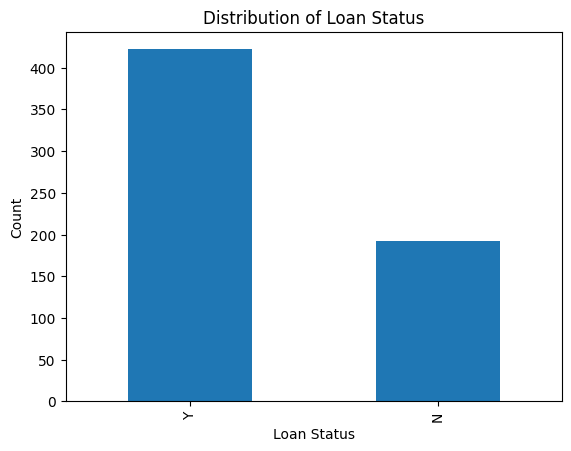

In [21]:
print(train_data['Loan_Status'].value_counts())

# Normalize the value counts to get the proportion of each class
print(train_data['Loan_Status'].value_counts(normalize=True))

train_data['Loan_Status'].value_counts().plot.bar()
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

From the analysis, we can see the loan of 422 out of 614 people (around 69%) was approved.

Next, we visualise each variable individually. The dataset contains three main types of features: categorical, ordinal, and numerical.

- Categorical Features: Variables that represent distinct groups or categories with no inherent order (e.g., Gender, Married).

- Ordinal Features: Categorical variables that have a meaningful order or ranking (e.g., Dependents, Education).

- Numerical Features: Variables that contain quantitative values and can be measured numerically (e.g., ApplicantIncome, LoanAmount).

Understanding feature types is essential, as different variable types require different preprocessing and visualisation techniques.

## Independent Variable (Categorical)

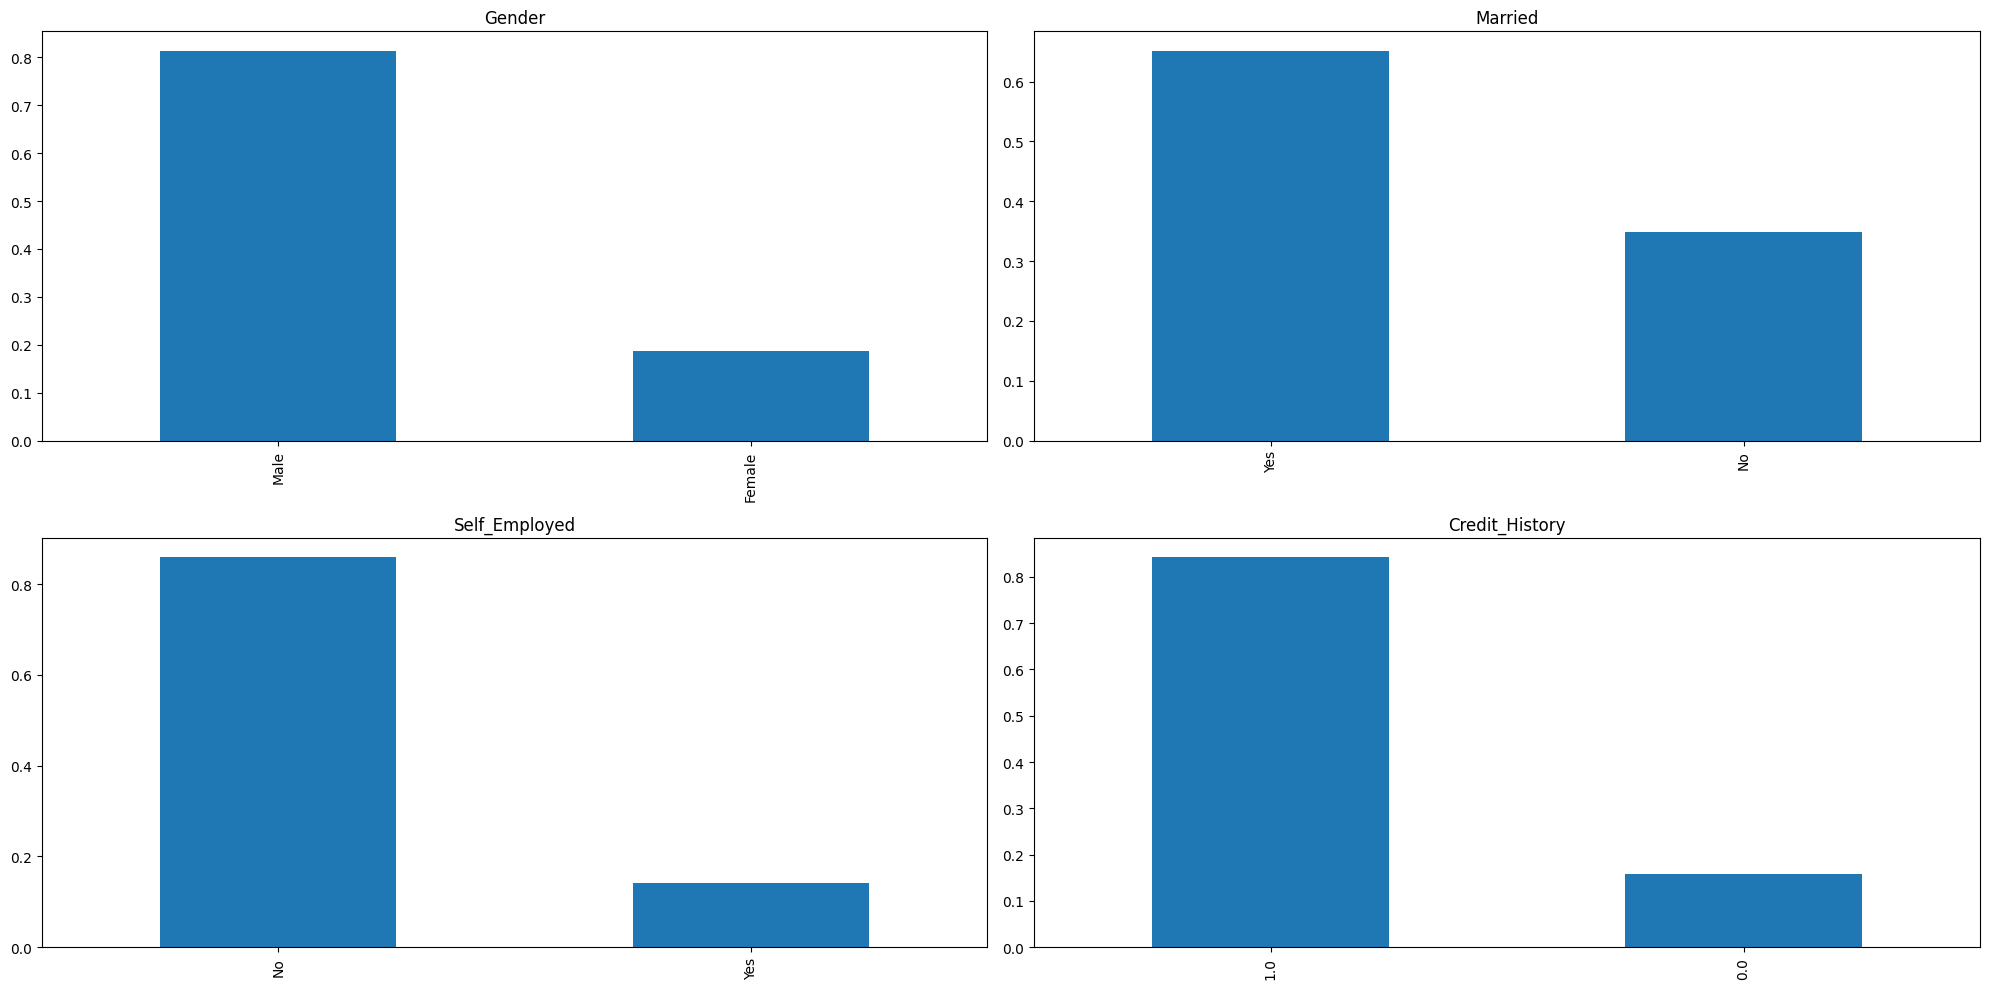

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

columns = ['Gender', 'Married', 'Self_Employed', 'Credit_History']

for ax, col in zip(axes.flatten(), columns):
    train_data[col].value_counts(normalize=True).plot.bar(ax=ax, title=col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


From the bar plots above, we can observe the following:

- Approximately 80% of applicants in the dataset are male.
- Around 65% of applicants are married.
- Roughly 15% of applicants are self-employed.
- About 85% of applicants have a positive credit history (i.e., they have previously repaid their debts).


## Independent Variable (Ordinal)

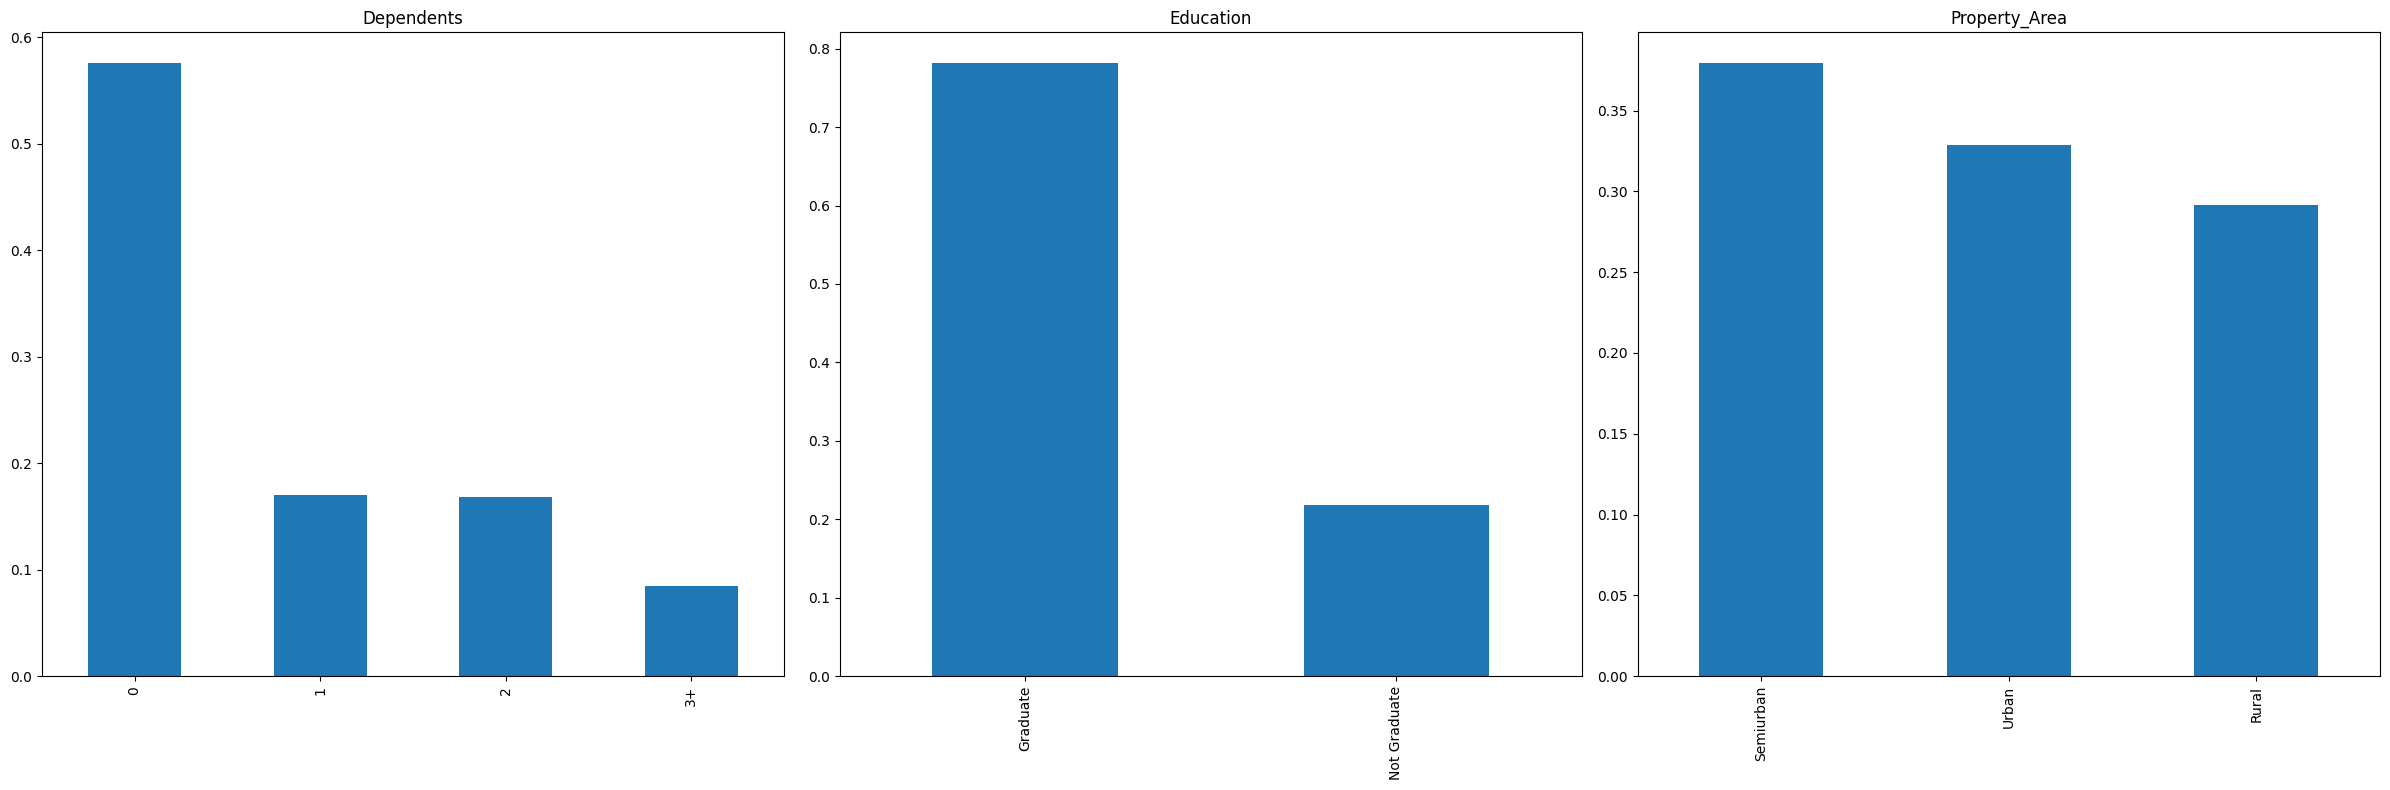

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(24,8))

columns = ['Dependents', 'Education', 'Property_Area']

for ax, col in zip(axes.flatten(), columns):
    train_data[col].value_counts(normalize=True).plot.bar(ax=ax, title=col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


From the bar plots above, we can infer that:

- The majority of applicants do not have any dependents.
- Approximately 80% of applicants are graduates.
- Most applicants are from semi-urban areas.

## Independent Variable (Numerical)

So far we have seen the categorical and ordinal varibales, now let's visualise the numerical variables. Let's look at the distribution of 'Applicant Income' first.

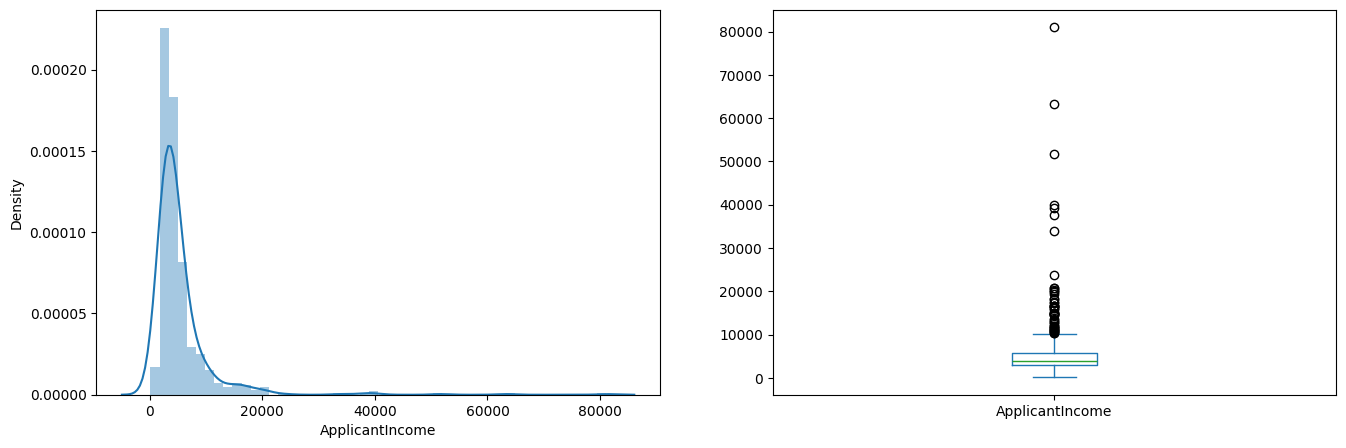

In [68]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['ApplicantIncome'])
plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

From the plots, we observe that the distribution of Applicant Income is heavily skewed to the left, indicating that it is not normally distributed. Most applicants fall within the lower income range, with fewer individuals earning significantly higher incomes.

Since many machine learning algorithms perform better when numerical features are approximately normally distributed, we will later apply transformations to reduce skewness and improve model performance.

The boxplot further confirms the presence of numerous outliers and extreme values. This likely reflects income disparity within the population. Part of this variation may also be explained by differences in education levels among applicants.

To explore this further, we will segment the data by Education and examine how income distribution varies across groups.

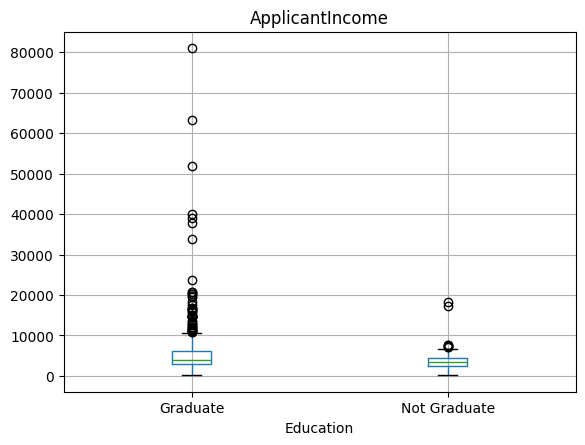

In [69]:
train_data.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')
plt.show()

We can see there are a higher number of graduates with very high incomes, which are appearing to be outliers.

Let's look at the Coaaplicant income distribution:

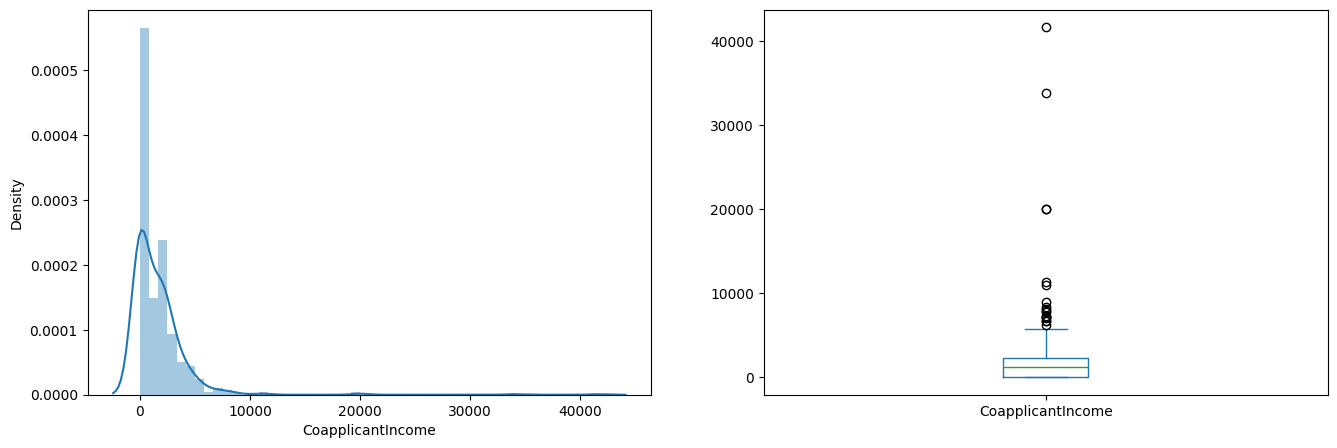

In [70]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['CoapplicantIncome'])
plt.subplot(122)
train_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

The distribution of Coapplicant Income shows a similar pattern to that of Applicant Income. The majority of coapplicants have incomes ranging between 0 and 5,000.

The distribution is positively skewed and not normally distributed, with several noticeable outliers. These extreme values may reflect significant income variation among coapplicants.

As with Applicant Income, transformation techniques may be applied later to address skewness and improve model performance.

Let's look at the distribution of LoanAmount variable.

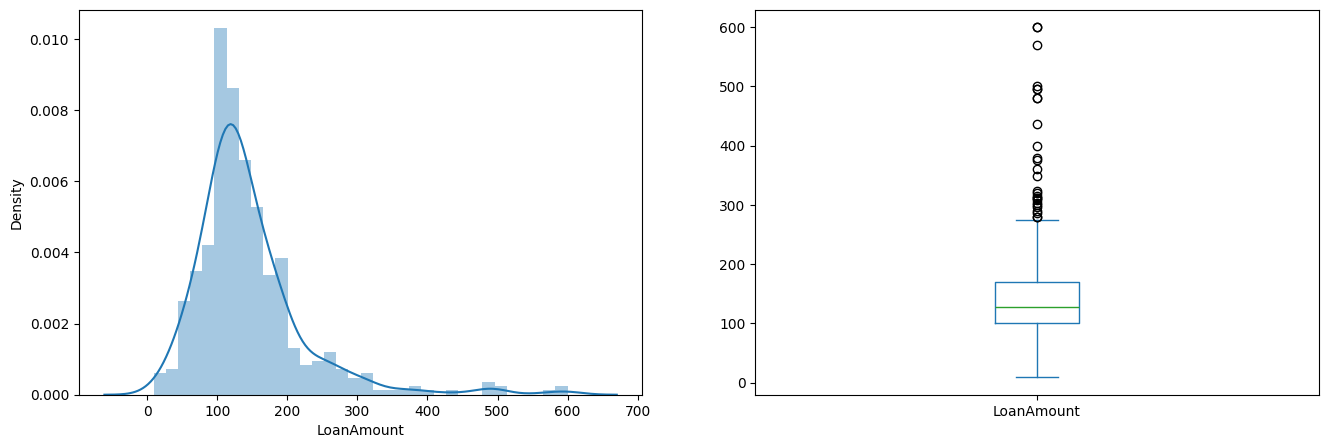

In [71]:
plt.figure(1)
plt.subplot(121)
df = train_data.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We again observe the presence of several outliers in this variable, although the overall distribution appears approximately normal. These outliers will be addressed in later sections during the data preprocessing stage.

Next, we will analyse how each feature relates to the target variable, Loan Status, in order to understand which variables may have the strongest influence on loan approval outcomes.

# BIVARIATE ANALYSIS

Before proceeding, let us recall the key hypotheses formulated earlier:

- Applicants with higher incomes are more likely to receive loan approval.

- Applicants with a positive credit history (i.e., those who have repaid previous debts) have a higher probability of loan approval.

- Loan approval may depend on the requested loan amount; smaller loan amounts are expected to have higher approval rates.

- Lower monthly repayment amounts (EMI) are associated with a greater likelihood of loan approval.

To evaluate these assumptions, we will perform bivariate analysis, examining the relationship between each feature and the target variable (Loan Status).

After analysing each variable individually through univariate analysis, we now explore how they interact with the target variable to better understand their predictive influence.

## Categorical Indepenedent Variable vs Target Variable

We begin by examining the relationship between the target variable (Loan Status) and the categorical independent variables.

To do this, we use a stacked bar plot, which displays the proportion of approved and rejected loans across different categories. This allows us to visually compare approval rates within each group and identify any noticeable patterns or trends.

<Axes: xlabel='Gender'>

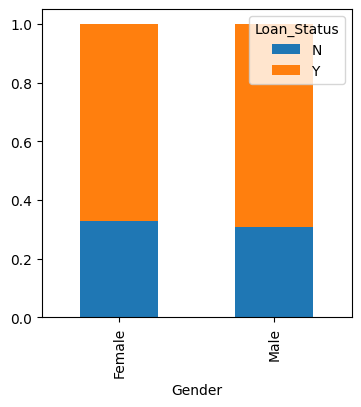

In [34]:
Gender = pd.crosstab(train_data['Gender'], train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

The proportion of male and female applicants is more or less for both approved and unapproved loans.

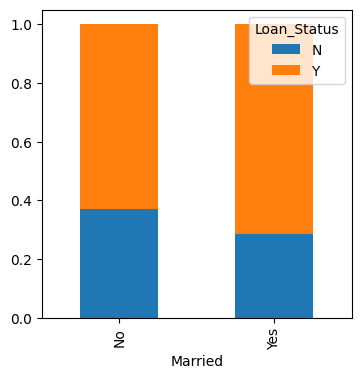

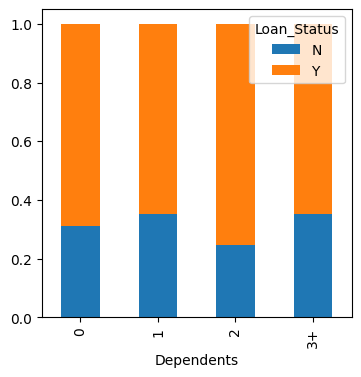

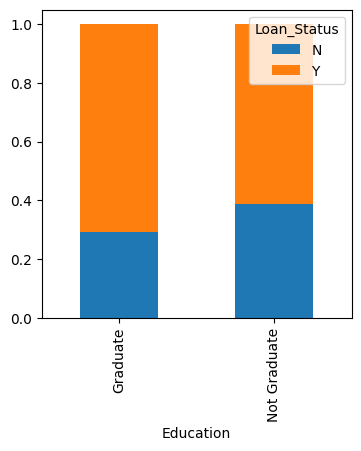

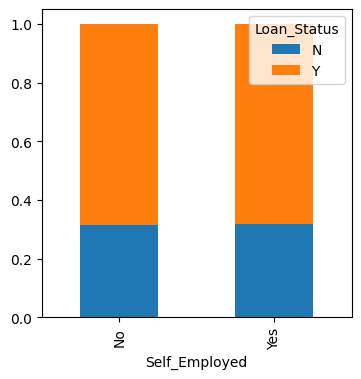

In [35]:
Married = pd.crosstab(train_data['Married'], train_data['Loan_Status'])
Dependents = pd.crosstab(train_data['Dependents'], train_data['Loan_Status'])
Education = pd.crosstab(train_data['Education'], train_data['Loan_Status'])
Self_Employed = pd.crosstab(train_data['Self_Employed'], train_data['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

From the stacked bar plots, we can observe the following:

- The proportion of married applicants is higher among approved loans compared to rejected loans.

- The distribution of applicants with 1 or 3+ dependents appears similar across both categories of Loan Status, suggesting a limited relationship with loan approval.

- No clear or significant pattern is observed between Self_Employed status and Loan Status.

Next, we examine the relationship between the remaining categorical independent variables and Loan Status to identify any additional patterns or influential factors.

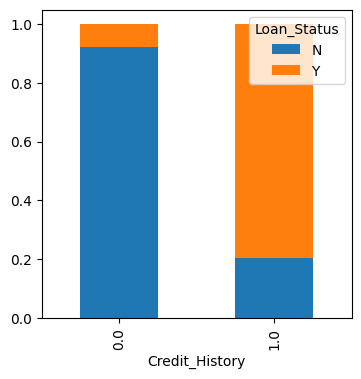

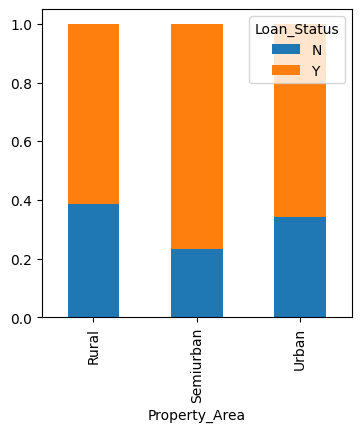

In [36]:
Credit_History = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
Property_Area = pd.crosstab(train_data['Property_Area'], train_data['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- People with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

## Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

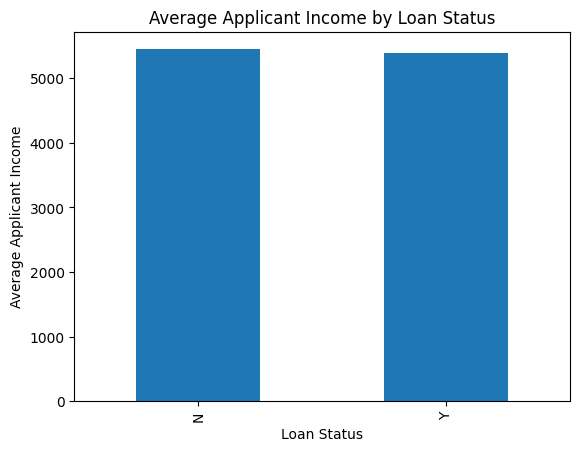

In [38]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.title('Average Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Applicant Income')
plt.show()

We don't see any changes in the mean income. So, let's make bins for applicant income variable based on the values in it and analyse the corresponding loan status for each bin.

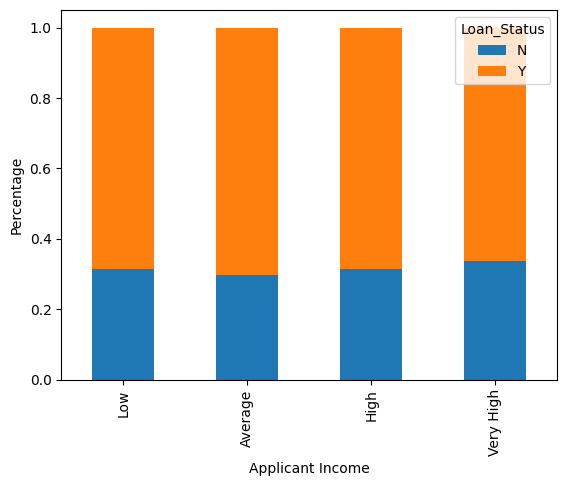

In [39]:
bins= [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train_data['Income_bin'] = pd.cut(train_data['ApplicantIncome'], bins, labels=group)
Income_bin = pd.crosstab(train_data['Income_bin'], train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Applicant Income')
P =plt.ylabel('Percentage')
plt.show()

From the analysis, it appears that Applicant Income does not have a strong impact on loan approval outcomes. This finding contradicts our initial hypothesis, where we assumed that higher applicant income would be associated with a greater likelihood of loan approval.

This suggests that income alone may not be a decisive factor in the approval process.

Let's analyse the coapplicant income and loan_amount variable in a similar manner.

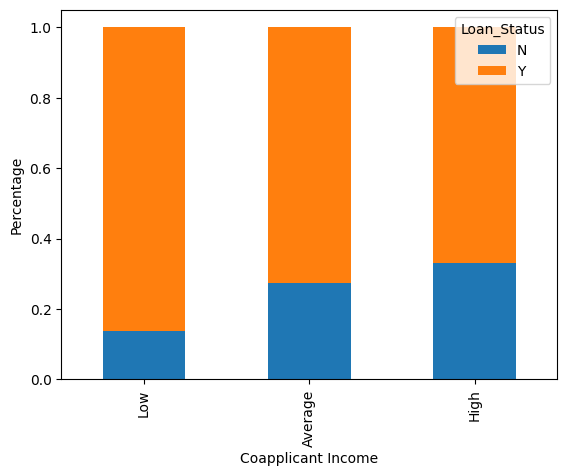

In [40]:
bins= [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train_data['Coapplicant_Income_bin'] = pd.cut(train_data['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin = pd.crosstab(train_data['Coapplicant_Income_bin'], train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Coapplicant Income')
P =plt.ylabel('Percentage')
plt.show()

The analysis suggests that lower Coapplicant Income is associated with a higher likelihood of loan approval. However, this result appears counterintuitive.

A possible explanation is that many applicants do not have a coapplicant, resulting in a coapplicant income of zero. In such cases, loan approval is unlikely to depend on coapplicant income alone, which may distort the observed relationship.

To address this, we will create a new variable that combines Applicant Income and Coapplicant Income. This will allow us to analyse the total household income and better understand the overall impact of income on loan approval.

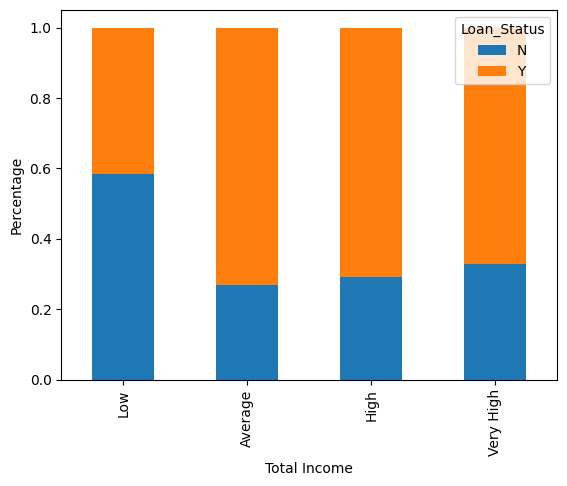

In [41]:
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']

bins= [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train_data['Total_Income_bin'] = pd.cut(train_data['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(train_data['Total_Income_bin'], train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
P =plt.ylabel('Percentage')
plt.show()

The proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High income.

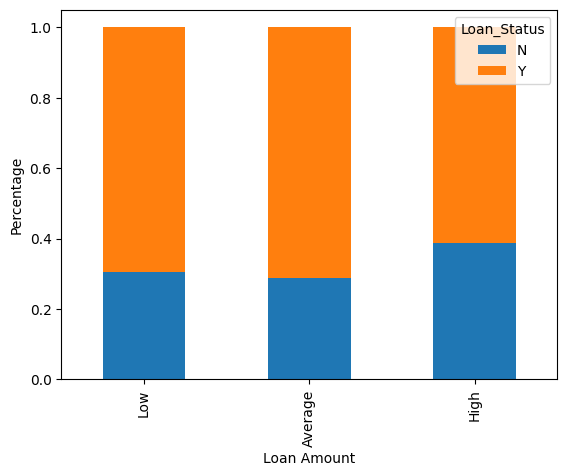

In [42]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train_data['LoanAmount_bin'] = pd.cut(train_data['LoanAmount'], bins, labels=group)
LoanAmount_bin = pd.crosstab(train_data['LoanAmount_bin'], train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Loan Amount')
P =plt.ylabel('Percentage')
plt.show()

From the analysis, we observe that the proportion of approved loans is higher for low and average loan amounts compared to high loan amounts. This supports our initial hypothesis that smaller loan amounts are more likely to be approved.

Now, we proceed with further data preprocessing:

- We will remove the loan amount bins that were created specifically for exploratory analysis, as they are no longer required.
- The value “3+” in the Dependents variable will be converted to 3 so that the feature can be treated as a numerical variable.
- The target variable (Loan_Status) will be encoded into binary form to facilitate correlation analysis with numerical features and to prepare the data for machine learning models.

Since models such as Logistic Regression require numerical inputs, we will encode:

N → 0, 
Y → 1

This ensures the dataset is fully compatible with downstream modelling techniques.

In [63]:
train_data = train_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'LoanAmount_bin', 'Total_Income'], axis=1)

In [64]:
train_data['Dependents'].replace('3+', 3, inplace=True)
test_data['Dependents'].replace('3+', 3, inplace=True)
train_data['Loan_Status'].replace('Y', 1, inplace=True)
train_data['Loan_Status'].replace('N', 0, inplace=True)

Next, we examine the correlation between all numerical variables in the dataset. To visualise these relationships, we use a heatmap, which represents correlation values through variations in colour intensity.

In the heatmap:
- Darker shades indicate a stronger correlation (positive or negative).
- Lighter shades indicate weaker relationships between variables.

This analysis helps identify features that are strongly related to each other or to the target variable, which is useful for understanding potential multicollinearity and feature importance before model building.

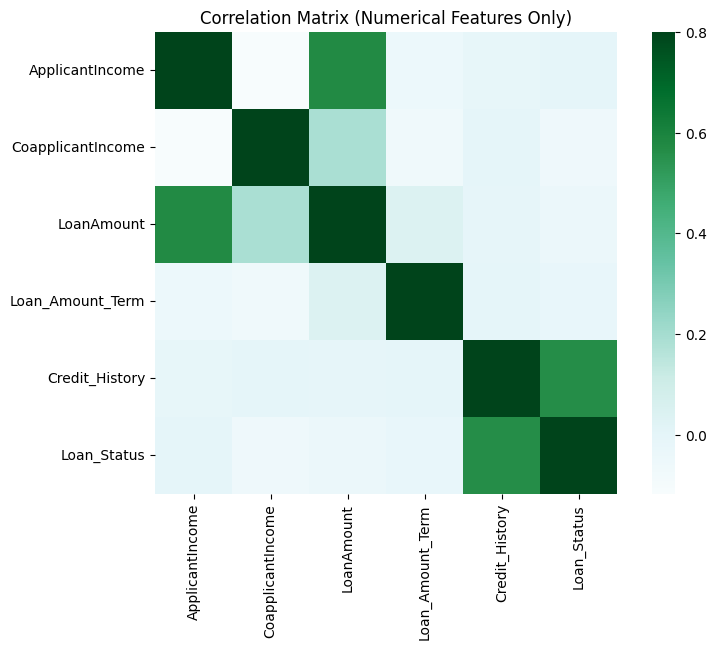

In [67]:
numerical_cols = train_data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_cols.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, vmax=0.8, square=True, cmap='BuGn')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()

plt.show()

From the correlation heatmap, the most strongly correlated variable pairs are:

- ApplicantIncome and LoanAmount

- Credit_History and Loan_Status

- LoanAmount and CoapplicantIncome

In particular, the strong correlation between Credit_History and Loan_Status suggests that credit history is a significant predictor of loan approval. Additionally, the relationship between income and loan amount indicates that applicants with higher incomes tend to request larger loans.

These insights provide valuable direction for feature importance analysis and model development.

# MISSING VALUES IMPUTATION

After completing the exploratory analysis of all variables, we now proceed to handle missing values and treat outliers.

Addressing missing data and extreme values is a crucial preprocessing step, as they can negatively impact model performance, distort statistical relationships, and reduce predictive accuracy.

By properly imputing missing values and managing outliers, we ensure that the dataset is clean, consistent, and suitable for reliable model development.

Let's list out feature-wiese count of missing values.

In [72]:
print(train_data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History features.

We will address the missing values in each feature individually.

The following imputation strategies will be applied:

- Numerical Variables: Missing values will be imputed using the mean or median, depending on the distribution of the variable.

- Categorical Variables: Missing values will be imputed using the mode (most frequent category).

Since the features Gender, Married, Dependents, Credit_History, and Self_Employed contain only a small number of missing values, we will fill them using their respective mode values.

This approach helps preserve the overall distribution of the data while ensuring completeness for model training.

In [73]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

Now let's try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan_Amount_Term variable.

In [74]:
train_data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

We can see the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [75]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

Next, we examine the LoanAmount variable. Since it is a numerical feature, the missing values can be imputed using either the mean or the median.

However, earlier analysis revealed the presence of outliers in the loan amount distribution. Because the mean is highly sensitive to extreme values, it may not be the most appropriate measure of central tendency in this case.

Therefore, we will use the median to impute missing values, as it is more robust to outliers and better represents the typical loan amount in the dataset.

In [76]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

Now let's check whether all the missing values are filled in the dataset.

In [77]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see all the missing values have been filled in the train dataset. Let's fill all the missing values in the test dataset too with the same approach.

In [78]:
test_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

# OUTLIER TREATMENT

As observed earlier in the univariate analysis, the LoanAmount variable contains several outliers. The presence of these extreme values affects the overall distribution and can negatively impact model performance.

Due to these outliers, most of the data is concentrated on the left side of the distribution, with a longer tail on the right. This pattern is known as right skewness (positive skewness).

One effective method to reduce skewness is applying a log transformation. Log transformation compresses larger values more than smaller ones, thereby reducing the impact of extreme observations and producing a distribution that is closer to normal.

Next, we will visualise the effect of the log transformation on the LoanAmount variable. We will apply the same transformation to the test dataset simultaneously to ensure consistency in preprocessing.

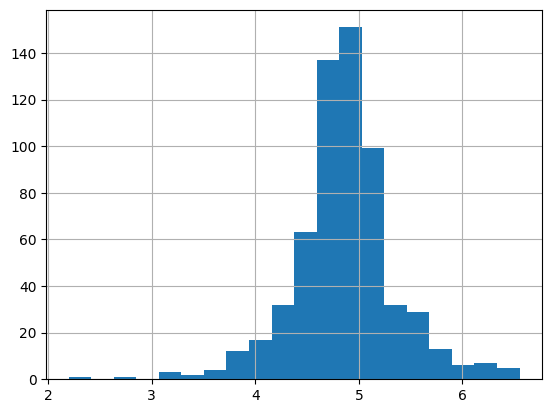

In [79]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)

test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

After applying the log transformation, the distribution now appears much closer to normal. The impact of extreme values has been significantly reduced, resulting in a more balanced and well-behaved feature distribution.

With the data properly preprocessed, we can now proceed to build a Logistic Regression model to predict loan approval outcomes. Once the model is trained on the training dataset, we will use it to generate predictions for the test dataset.

# MODEL BUILDING

## Linear Regression

Let us begin by building our first predictive model to estimate the target variable, Loan_Status. We will start with Logistic Regression, a widely used classification algorithm designed for predicting binary outcomes.

Before training the model, we drop the Loan_ID column, as it serves only as a unique identifier and does not contribute any predictive value toward loan approval.

In [80]:
train_data = train_data.drop('Loan_ID', axis=1)
test_data = test_data.drop('Loan_ID', axis=1)

We will use scikit-learn (sklearn) to build our machine learning models. Scikit-learn is a widely used open-source Python library that provides efficient tools for data preprocessing, model building, and evaluation.

In scikit-learn, the target variable must be stored separately from the feature set. Therefore, we will separate the Loan_Status column from the training dataset and store it in a separate variable. The remaining columns will be used as the input features for model training.

In [81]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

Next, we convert the categorical variables into dummy variables.

Dummy encoding transforms categorical features into binary (0 and 1) indicators, allowing machine learning algorithms to process them effectively. Each category is represented as a separate column, where:

- 1 indicates the presence of the category
- 0 indicates its absence

This step is necessary because most machine learning models, including Logistic Regression, require numerical input features.

In [82]:
X = pd.get_dummies(X)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

Next, we train the model using the training dataset and generate predictions for the test dataset. However, before relying on these predictions, it is important to validate the model’s performance.

One effective approach is to split the original training dataset into two subsets: a training set and a validation set. The model is trained on the training subset and then evaluated on the validation subset.

This process allows us to assess how well the model generalises to unseen data and helps prevent overfitting before making final predictions on the test dataset.

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The dataset has now been split into training and validation sets.

Next, we import LogisticRegression and accuracy_score from scikit-learn. We then fit the Logistic Regression model using the training data and evaluate its performance on the validation set.

This allows us to measure the model’s predictive accuracy before applying it to the test dataset.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

Next, we generate predictions for the validation set using the trained model. We then evaluate the model’s performance by calculating its accuracy score.

The accuracy metric measures the proportion of correctly predicted instances out of the total predictions made, providing an initial indication of how well the model performs on unseen data.

In [85]:
pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.827027027027027

The model achieves an accuracy of approximately 83%, indicating that it correctly predicts the loan status for 83% of the validation observations.

With the model’s performance evaluated and validated, we can now proceed to generate predictions for the test dataset and prepare the final submission file.

In [86]:
pred_test = model.predict(test_data)

Next, we create a new dataframe containing only the required columns for submission: Loan_ID and the corresponding predicted Loan_Status.

Since the competition expects predictions in 'Y' and 'N', we convert the model outputs from 1/0 to Y/N.

Finally, we export the dataframe as a CSV file in the correct submission format and upload it to evaluate the model’s performance.

In [91]:
submission = pd.DataFrame({
    'Loan_ID': test_data_copy['Loan_ID'],
    'Loan_Status': pred_test
})

submission['Loan_Status'] = submission['Loan_Status'].replace({0: 'N', 1: 'Y'})

submission.to_csv('submission.csv', index=False)


After submitting the predictions, the model achieved a score of 0.78 (78%) on the evaluation metric.

While this performance is slightly lower than the validation accuracy, it provides a baseline result that can be improved through further feature engineering, hyperparameter tuning, and experimenting with more advanced models.

## Logistic Regression using Stratified K-Folds Cross Validation

To evaluate how well our model generalises to unseen data, we use a validation technique. Validation involves setting aside a portion of the dataset that is not used during training. The model is then tested on this reserved data before being finalised, providing a more reliable estimate of real-world performance.

In this section, we implement Stratified K-Fold Cross-Validation.

Stratification ensures that each fold maintains the same class distribution as the original dataset. This is particularly important for classification problems, as it guarantees that each fold is a representative sample of the overall data.

Next, we import StratifiedKFold from scikit-learn and train the model using this cross-validation strategy.

In [92]:
from sklearn.model_selection import StratifiedKFold

Next, we train a Logistic Regression model using Stratified 5-Fold Cross-Validation to obtain a more reliable estimate of model performance. After training across the folds, we fit the model on the full training dataset and generate predictions for the test dataset.

In [96]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
fold_accuracies = []
for train_index, test_index in kf.split(X, y):
    print(f'Fold {i}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    fold_accuracies.append(score)
    print(f'Accuracy: {score}\n')
    i+=1

mean_accuracy = np.mean(fold_accuracies)
print(f'Mean Cross-Validation Accuracy: {mean_accuracy}')

pred_test = model.predict(test_data)
pred = model.predict_proba(X_test)[:,1]

Fold 1
Accuracy: 0.8048780487804879

Fold 2
Accuracy: 0.8373983739837398

Fold 3
Accuracy: 0.7804878048780488

Fold 4
Accuracy: 0.7804878048780488

Fold 5
Accuracy: 0.7950819672131147

Mean Cross-Validation Accuracy: 0.799666799946688


The mean cross-validation accuracy for this model is 0.81, indicating that the model performs consistently across different data splits.

To further evaluate the model’s classification performance, we will now visualise the ROC (Receiver Operating Characteristic) curve. The ROC curve illustrates the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate, helping us assess how well the model distinguishes between approved and rejected loan applications.

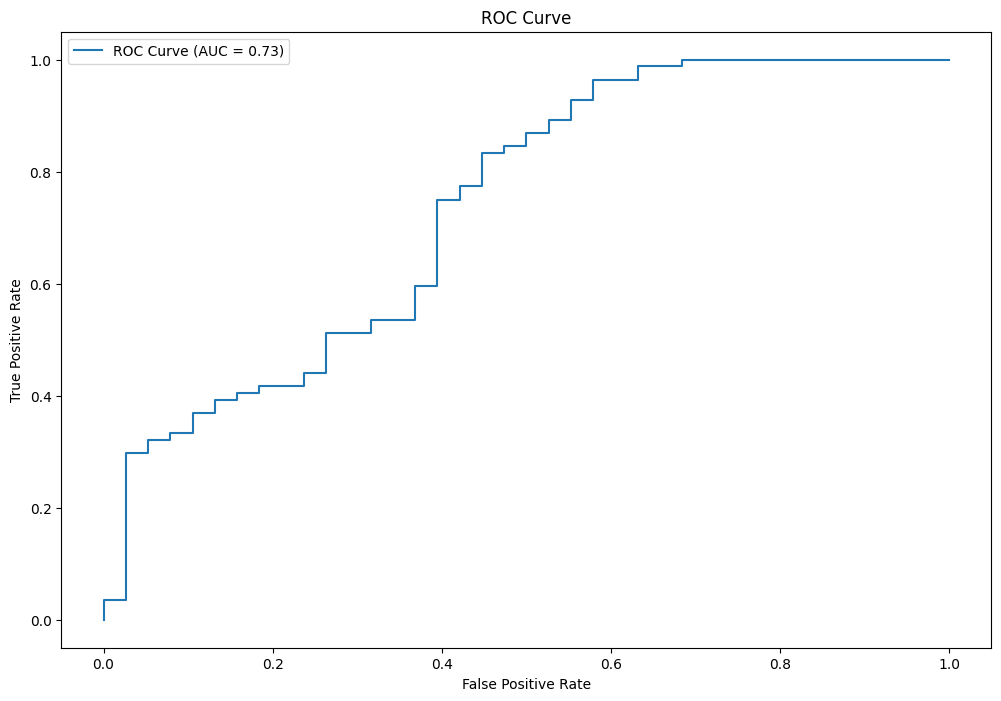

In [98]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)  

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The model achieves an AUC (Area Under the Curve) score of 0.73, indicating a reasonable ability to distinguish between approved and rejected loan applications. While not perfect, this suggests the model performs better than random classification and has moderate discriminatory power.

Next, we save the prediction results for the test dataset and generate the submission file. We then submit the predictions to evaluate the final performance score of this model.

In [99]:
submission = pd.DataFrame({
    'Loan_ID': test_data_copy['Loan_ID'],
    'Loan_Status': pred_test
})

submission['Loan_Status'] = submission['Loan_Status'].replace({0: 'N', 1: 'Y'})

submission.to_csv('submission_logistic_kfolds_validation.csv', index=False)

After submitting the predictions, the model achieved an accuracy score of 0.76 on the evaluation metric.

Although this performance is slightly lower than the validation score, it provides a solid baseline. In the next steps, we will focus on improving the model through further feature engineering, hyperparameter tuning, and experimenting with more advanced algorithms.